# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [33]:
# Download the data
 ! wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

IndentationError: unexpected indent (<ipython-input-33-d287f97239b4>, line 2)

In [ ]:
# check if the data is downloaded
%ls -l

In [34]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [35]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [36]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [37]:
dataset.shape

(768, 9)

In [38]:
dataset[0:4, 0:8]

array([[6.00e+00, 1.48e+02, 7.20e+01, 3.50e+01, 0.00e+00, 3.36e+01,
        6.27e-01, 5.00e+01],
       [1.00e+00, 8.50e+01, 6.60e+01, 2.90e+01, 0.00e+00, 2.66e+01,
        3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, 0.00e+00, 0.00e+00, 2.33e+01,
        6.72e-01, 3.20e+01],
       [1.00e+00, 8.90e+01, 6.60e+01, 2.30e+01, 9.40e+01, 2.81e+01,
        1.67e-01, 2.10e+01]])

In [39]:
# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[:, 0:8]
y = dataset[:, 8]

In [40]:
# print the shape of x
#
X.shape

(768, 8)

In [41]:
# save to number of input dimensions in input_dim
input_dim = X
input_dim 

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [42]:
# shape of y
# TODO
y.shape

(768,)

In [43]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_dim, y, test_size=0.15, stratify=y, random_state=42)

In [44]:
# shape of X_test
# TODO
X_test.shape

(116, 8)

# Model

In [45]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
# TODO
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=8))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
# TODO
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Fit the model
#
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO

history = model.fit(X_train, y_train, validation_split=0.15, batch_size=10, epochs=300)

Train on 554 samples, validate on 98 samples
Epoch 1/300
554/554 [==============================] - 1s 1ms/step - loss: 4.5648 - acc: 0.6173 - val_loss: 3.0777 - val_acc: 0.6531
Epoch 2/300
554/554 [==============================] - 0s 131us/step - loss: 1.8934 - acc: 0.5704 - val_loss: 1.1339 - val_acc: 0.6020
Epoch 3/300
554/554 [==============================] - 0s 149us/step - loss: 0.8686 - acc: 0.6083 - val_loss: 0.8669 - val_acc: 0.6633
Epoch 4/300
554/554 [==============================] - 0s 180us/step - loss: 0.7631 - acc: 0.6282 - val_loss: 0.7495 - val_acc: 0.6837
Epoch 5/300
554/554 [==============================] - 0s 181us/step - loss: 0.7053 - acc: 0.6606 - val_loss: 0.7453 - val_acc: 0.6633
Epoch 6/300
554/554 [==============================] - 0s 209us/step - loss: 0.7141 - acc: 0.6625 - val_loss: 0.6938 - val_acc: 0.6837
Epoch 7/300
554/554 [==============================] - 0s 178us/step - loss: 0.6845 - acc: 0.6679 - val_loss: 0.6971 - val_acc: 0.6939
Epoch 8/300


In [48]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


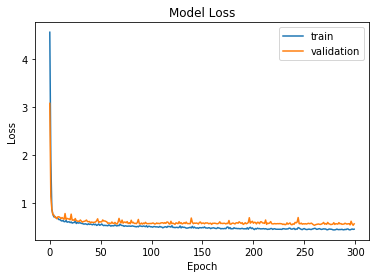

In [49]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'])
plt.show()

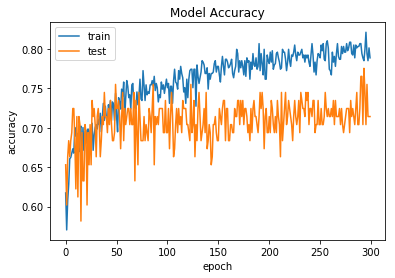

In [50]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_acc'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [53]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test)

116/116 [==============================] - 0s 66us/step


In [54]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 70.69%


In [55]:
print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.6690251930006619
Test accuracy: 0.706896555834803
